In [3]:
import pandas as pd
import pandas_datareader as pdr
from numpy.random import normal as Z
import matplotlib.pyplot as plt

In [4]:
precos = pdr.DataReader('^BVSP', data_source='yahoo', start='2022-01-01', end='2022-06-15')

In [8]:
precos['Close']

Date
2022-01-03    103922
2022-01-04    103514
2022-01-05    101006
2022-01-06    101561
2022-01-07    102719
               ...  
2022-06-09    107094
2022-06-10    105481
2022-06-13    102598
2022-06-14    102063
2022-06-15    102807
Name: Close, Length: 114, dtype: int64

<AxesSubplot:xlabel='Date'>

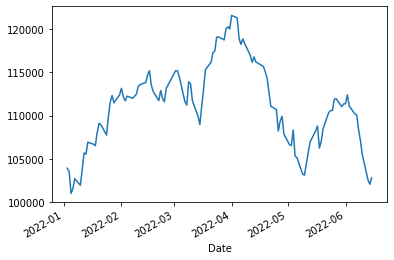

In [7]:
precos['Close'].plot()

In [9]:
preco_inicial = precos['Close'][-1]

# Mudança percental entre o elemento atual e o anterior
returns = precos['Close'].pct_change()

In [10]:
returns

Date
2022-01-03         NaN
2022-01-04   -0.003926
2022-01-05   -0.024229
2022-01-06    0.005495
2022-01-07    0.011402
                ...   
2022-06-09   -0.011756
2022-06-10   -0.015062
2022-06-13   -0.027332
2022-06-14   -0.005215
2022-06-15    0.007290
Name: Close, Length: 114, dtype: float64

In [12]:
n_cenarios = 10 # número de cenários
n_dias = 365 # número de dias

df = pd.DataFrame(columns=[i for i in range(n_cenarios)]) 

df

,0,1,2,3,4,5,6,7,8,9


In [25]:
n_cenarios = 10000 # número de cenários
n_dias = 365 # número de dias

df = pd.DataFrame(columns=[i for i in range(n_cenarios)]) # Cria o DataFrame vazio, mas com as colunas

volatilidade_diaria = returns.std()

for cenario in range(n_cenarios):
    
    preco = preco_inicial * (1 + Z(0, volatilidade_diaria))
    lista_precos = [preco]
    
    for dia in range(n_dias):
        preco = lista_precos[dia] * (1 + Z(0, volatilidade_diaria))
        lista_precos.append(preco)
    
    df[cenario] = lista_precos

df = df/preco_inicial # Normalização

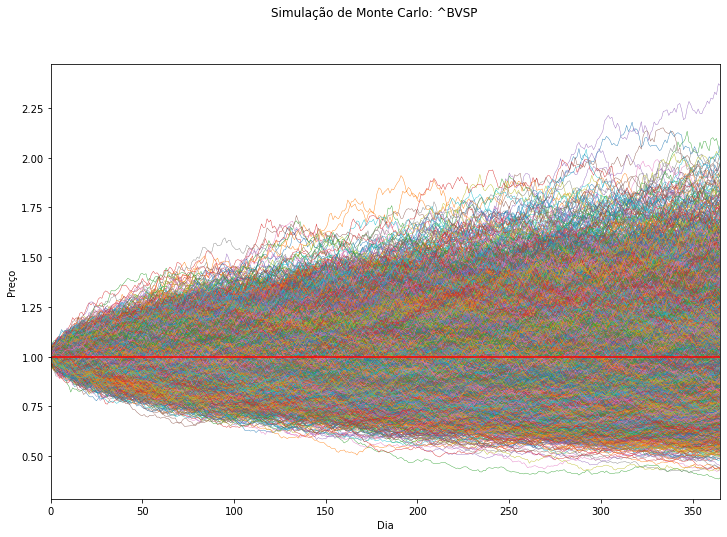

In [26]:
fig = plt.figure(figsize = (12,8))
fig.suptitle('Simulação de Monte Carlo: ^BVSP')
plt.plot(df, lw = 0.4)
#plt.axhline(y = preco_inicial, color = 'r', linestyle = '-')
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.xlim([0,n_dias])
plt.show()

<AxesSubplot:>

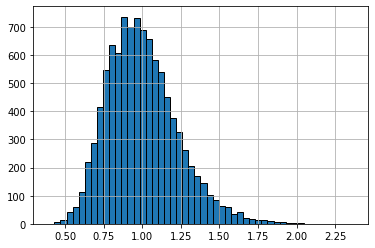

In [28]:
df.iloc[365].hist(bins=50, edgecolor='black')

In [29]:
df.iloc[365].describe()

count    10000.000000
mean         1.000893
std          0.228687
min          0.391046
25%          0.836287
50%          0.977971
75%          1.134467
max          2.363666
Name: 365, dtype: float64

In [32]:
precos2 = pdr.DataReader('^BVSP', data_source='yahoo', start='2022-06-15', end='2022-06-17')
precos2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-15,103952,102046,102068,102807,16023500,102807
2022-06-17,102801,98402,102800,99825,18927300,99825


In [33]:
precos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,106125,103413,104823,103922,11128500,103922
2022-01-04,104276,103096,103922,103514,11491600,103514
2022-01-05,103514,100850,103514,101006,0,101006
2022-01-06,102235,101000,101006,101561,11749200,101561
2022-01-07,102719,101104,101561,102719,11733200,102719
...,...,...,...,...,...,...
2022-06-09,108510,107068,108367,107094,11955500,107094
2022-06-10,107092,104648,107091,105481,12840500,105481
2022-06-13,105478,101700,105476,102598,13837900,102598


In [36]:
df2 = df.iloc[0] * preco_inicial # Normalização

In [39]:
df2.describe()

count     10000.000000
mean     102829.007692
std        1228.971807
min       97843.462670
25%      102003.997494
50%      102834.241812
75%      103668.690670
max      107783.956426
Name: 0, dtype: float64